In [3]:
import tensorflow as tf
import mtcnn
from mtcnn import MTCNN
import PIL
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import display

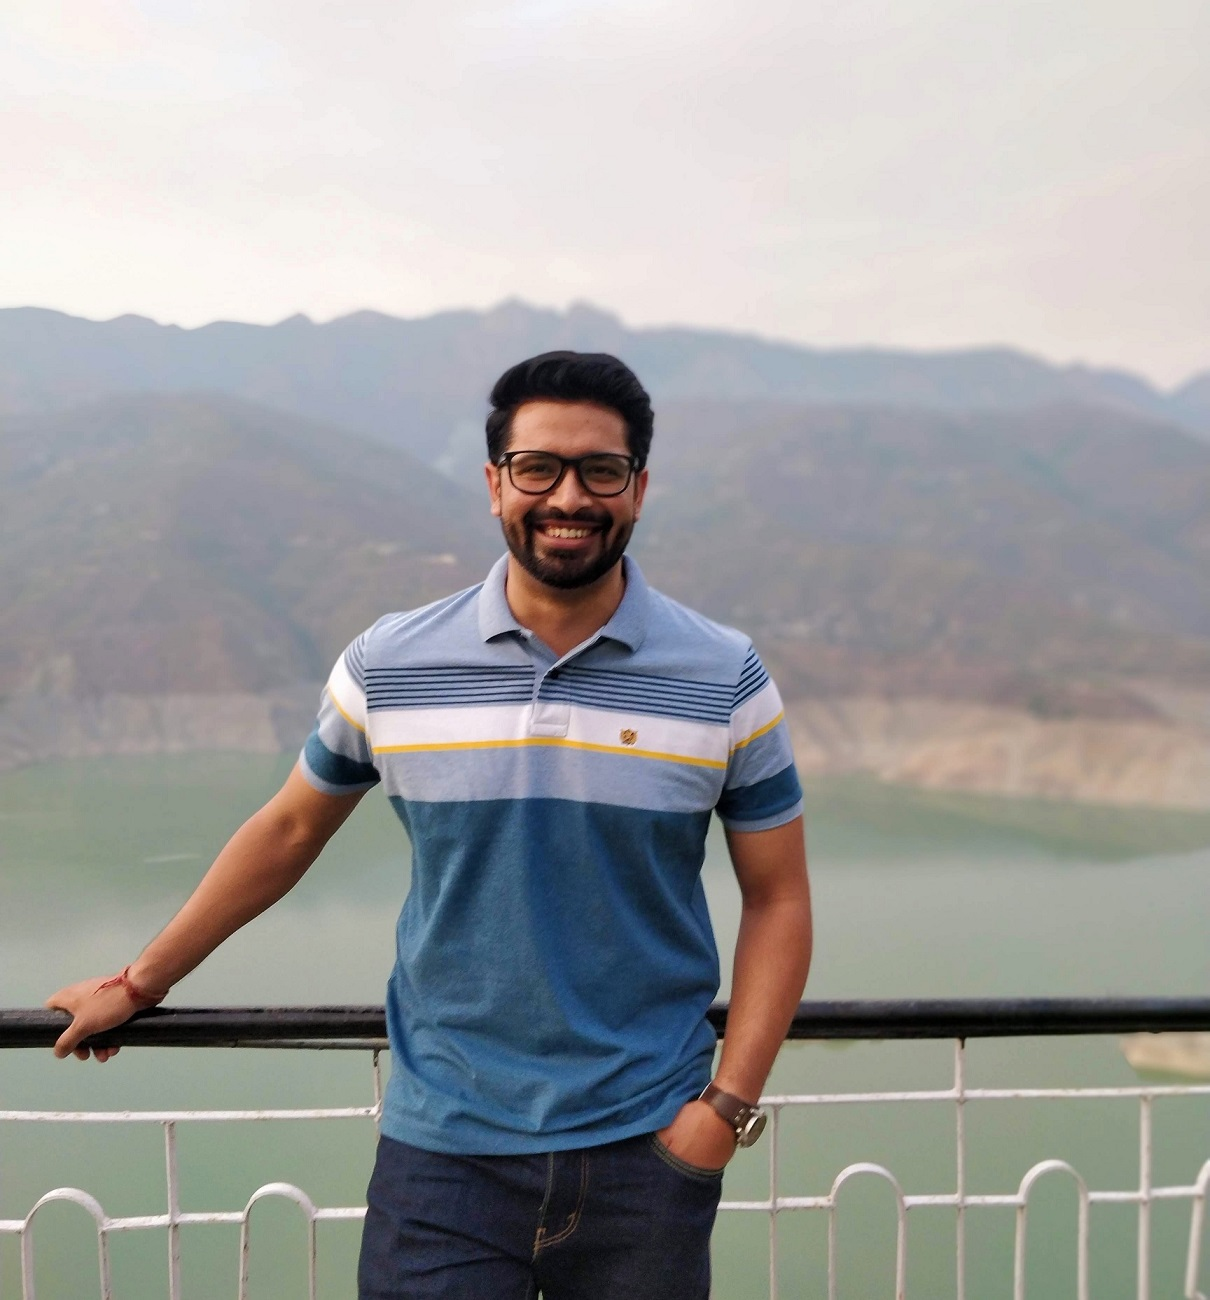

In [5]:
image = Image.open('../Sample data/aditya.jpg')
image

In [5]:
image = image.convert('RGB')
pixels = np.asarray(image)

In [6]:
pixels.shape

(3713, 3456, 3)

In [7]:
detector= MTCNN()

In [8]:
result = detector.detect_faces(pixels) 

In [11]:
result

[{'box': [1418, 1140, 389, 518],
  'confidence': 1.0,
  'keypoints': {'left_eye': (1531, 1343),
   'right_eye': (1720, 1342),
   'nose': (1633, 1452),
   'mouth_left': (1530, 1521),
   'mouth_right': (1719, 1520)}}]

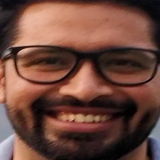

In [10]:
l = []
for i in range(len(result)):
    x1, y1, width, height = result[i]['box']
    x1, y1 = abs(x1) , abs(y1)
    x2, y2 = abs(x1) + width , abs(y1) + height 
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize((160,160))
    face_array = np.asarray(image)
    display(image)